# Data Exploration and Visulization


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os, datetime

df = pd.read_csv("GOOG.csv", header = 0)
print("number of rows :", df.shape[0])
print (df.dtypes.index)

number of rows : 2769
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [2]:
# sample the data set
df.iloc[1:10]

,Date,Open,High,Low,Close,Adj Close,Volume
1,2006-01-04,220.515762,223.029404,218.454163,221.181427,221.181427,30771600
2,2006-01-05,221.558975,224.316040,219.323517,224.162048,224.162048,21757200
3,2006-01-06,226.958847,233.729813,225.155579,231.325455,231.325455,35744800
4,2006-01-09,231.698029,235.170441,228.980698,231.941452,231.941452,25750100
5,2006-01-10,230.709457,233.605621,229.527145,233.362198,233.362198,18312400
6,2006-01-11,234.112320,236.019913,233.074081,234.291168,234.291168,18131900
7,2006-01-12,235.329407,235.960312,229.258896,230.317017,230.317017,20382200
8,2006-01-13,230.654816,231.936478,229.313538,231.618546,231.618546,15412700
9,2006-01-17,230.033844,233.431747,229.770569,232.045761,232.045761,16648100


In [3]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.eq(0).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# sample statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,375.902446,379.276280,372.115031,375.714687,375.714687,6.931651e+06
std,179.439162,180.423646,178.249847,179.377893,179.377893,6.539445e+06
min,130.406830,133.814667,122.850975,127.888214,127.888214,7.900000e+03
25%,240.778961,243.709900,238.588211,240.858444,240.858444,2.821100e+06
50%,298.727081,301.851746,296.461792,298.558167,298.558167,5.028200e+06
75%,528.318787,532.658752,524.247375,528.444336,528.444336,8.763800e+06
max,816.679993,816.679993,805.140015,813.109985,813.109985,8.276810e+07


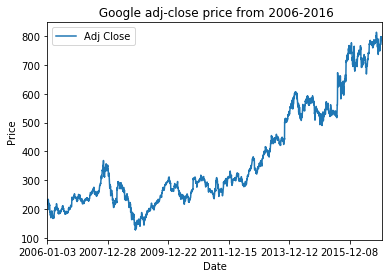

In [6]:
# Overview of google close price vs date
ax = df.plot(x = 'Date', y = 'Adj Close', title =" Google adj-close price from 2006-2016")
ax.set_ylabel("Price")


In [7]:
# Calculate technical indicator bbands and sma and append them to the original dataset 
from datetime import datetime
#df['Date'] = pd.to_datetime(df['Date'])
#df = pd.DataFrame(index=Date)
prices_normed = df['Adj Close']/ df['Adj Close'].iloc[0]
df['Adj Close'] = prices_normed
df.dropna(inplace=True)
df['rolling_mean'] = pd.Series.rolling(prices_normed, window=7, min_periods=1).mean()
rolling_std = pd.Series.rolling(prices_normed, window=7, min_periods = 1).std()
df['upper_band'] = df['rolling_mean'] + (2 * rolling_std)
df['lower_band'] = df['rolling_mean'] - (2 * rolling_std)

df['SMA'] = pd.Series.rolling(prices_normed, window=7, min_periods=1).mean()
df['price/SMA'] = prices_normed/df['SMA']
print (df.dtypes.index)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'rolling_mean', 'upper_band', 'lower_band', 'SMA', 'price/SMA'],
      dtype='object')


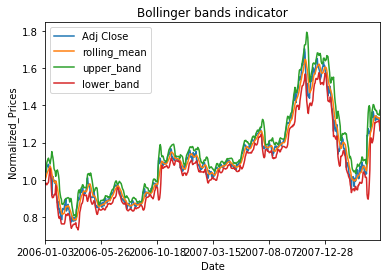

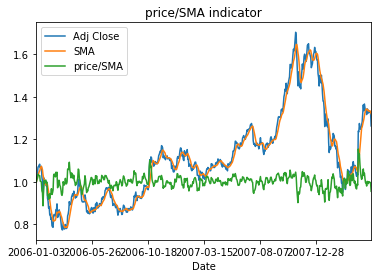

In [8]:
# plot of BBands and sma
df_BBbands = pd.DataFrame(df.iloc[0:600], columns = ['Date', 'Adj Close','rolling_mean', 'upper_band', 'lower_band'])
ax1 = df_BBbands.plot(x = 'Date', title = "Bollinger bands indicator")
ax1.set_ylabel("Normalized_Prices")

df_SMA = pd.DataFrame(df.iloc[0:600], columns = ['Date', 'Adj Close','SMA', 'price/SMA'])
ax2 = df_SMA.plot(x = 'Date', title = "price/SMA indicator" )
ax.set_ylabel("Normalized_Prices")


In [9]:
df.iloc[0:10]

,Date,Open,High,Low,Close,Adj Close,Volume,rolling_mean,upper_band,lower_band,SMA,price/SMA
0,2006-01-03,209.894836,216.427353,207.758728,216.208771,1.000000,26413000,1.000000,NaN,NaN,1.000000,1.000000
1,2006-01-04,220.515762,223.029404,218.454163,221.181427,1.022999,30771600,1.011500,1.044026,0.978974,1.011500,1.011369
2,2006-01-05,221.558975,224.316040,219.323517,224.162048,1.036785,21757200,1.019928,1.057096,0.982760,1.019928,1.016528
3,2006-01-06,226.958847,233.729813,225.155579,231.325455,1.069917,35744800,1.032425,1.090905,0.973946,1.032425,1.036314
4,2006-01-09,231.698029,235.170441,228.980698,231.941452,1.072766,25750100,1.040494,1.102677,0.978310,1.040494,1.031017
5,2006-01-10,230.709457,233.605621,229.527145,233.362198,1.079337,18312400,1.046968,1.110993,0.982942,1.046968,1.030918
6,2006-01-11,234.112320,236.019913,233.074081,234.291168,1.083634,18131900,1.052206,1.116892,0.987519,1.052206,1.029869
7,2006-01-12,235.329407,235.960312,229.258896,230.317017,1.065253,20382200,1.061527,1.107084,1.015971,1.061527,1.003510
8,2006-01-13,230.654816,231.936478,229.313538,231.618546,1.071273,15412700,1.068424,1.098873,1.037975,1.068424,1.002667
9,2006-01-17,230.033844,233.431747,229.770569,232.045761,1.073249,16648100,1.073633,1.085827,1.061438,1.073633,0.999642


# Supervised learning models

In [52]:
# metrics
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
#from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def print_metrics(y_true, y_predict):
    rmse = sqrt(mean_squared_error(y_true, y_predict))
    print("Root Mean Squared Error: ", rmse)
    print("R2 score: ", r2_score(y_true, y_predict))
    return rmse

In [11]:
# prepare different size of training dataset and test dataset
#predict y value is price of 7 days later
from datetime import datetime
df = df.dropna()
#df['Date'] = pd.to_datetime(df['Date'])
df['Adj_Close_7_Days_Later'] = df['Adj Close']
df['Adj_Close_7_Days_Later'] = df['Adj_Close_7_Days_Later'].shift(-7)


X_train_1000 = df.iloc[0:1000,1:-1]
y_train_1000 = df.iloc[0:1000, -1]
X_test_1000 = df.iloc[1000:1253,1:-1]
y_test_1000 = df.iloc[1000:1253, -1]


#X_train_2000 = df.iloc[0:2000,1:-1]
#y_train_2000 = df.iloc[0:2000, -1]
#X_test_2000 = df.iloc[2000:2253,1:-1]
#y_test_2000 = df.iloc[2000:2253, -1]

In [53]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


X_train = X_train_1000
y_train = y_train_1000

X_test = X_test_1000
y_test = y_test_1000

linear = linear_model.LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=10)
forest = RandomForestRegressor() 


for model in [linear, knn, tree, forest]:
    print ("\n{}: \n".format(model.__class__.__name__))
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print_metrics(y_test, y_predict)
    print ('-'*32)
    





LinearRegression: 

Root Mean Squared Error:  0.0583506683985424
R2 score:  0.745021670918
--------------------------------

KNeighborsRegressor: 

Root Mean Squared Error:  0.18897031188369667
R2 score:  -1.6742300222
--------------------------------

DecisionTreeRegressor: 

Root Mean Squared Error:  0.09198122414156444
R2 score:  0.36640758329
--------------------------------

RandomForestRegressor: 

Root Mean Squared Error:  0.07093021888637432
R2 score:  0.62323183454
--------------------------------


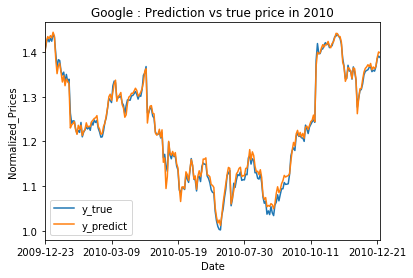

In [13]:
# Select columns and plot for linear regression comparation of prediction and real price using training size 1000
df_plot = pd.DataFrame()
df_plot['Date'] = df[1000:1253]['Date']
df_plot['y_true'] = df[1000:1253]['Adj Close']
df_plot['y_predict'] = linear.predict(X_test)

ax = df_plot.plot(x = 'Date', title = 'Google : Prediction vs true price in 2010')
ax.set_ylabel("Normalized_Prices")


In [54]:
# Refinement for Linear Regression : choose features to see if better results can happen
# choose features ('Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
#      'rolling_mean', 'upper_band', 'lower_band', 'SMA', 'price/SMA')


X_train = df.iloc[0:1000,[1, 2, 3, 5, 6, 7, 8, 9, 10]]
y_train = df.iloc[0:1000, -1]
X_test = df.iloc[1000:1253,[1, 2, 3, 5, 6,7,8, 9, 10]]
y_test = df.iloc[1000:1253, -1]


linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
y_predict = linear.predict(X_test)
print_metrics(y_test, y_predict)
    


Root Mean Squared Error:  0.0583506683985424
R2 score:  0.745021670918


0.0583506683985424

In [55]:
# Refinment for KNN
from sklearn.grid_search import GridSearchCV

# Select training data size and corresponding test data set.
X_train = X_train_1000
y_train = y_train_1000

X_test = X_test_1000
y_test = y_test_1000
k = [1,5,10,15,20,25, 30]
leaves = [1,5,10,15,20,25, 30]
weights = ['uniform', 'distance']
parameters = {'n_neighbors': k, 'leaf_size': leaves, 'weights': weights}
    
# GridSearchCV
knn_optimized = GridSearchCV(knn, parameters, cv=10)
knn_optimized.fit(X_train, y_train)
knn_optimized.predict(X_test)
print("Best Estimator :", knn_optimized.best_estimator_)

print_metrics(y_test, model.predict(X_test))




Best Estimator : KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=25, p=2,
          weights='uniform')
Root Mean Squared Error:  0.07093021888637432
R2 score:  0.62323183454


0.07093021888637432

In [58]:
# Decision Tree Refinment

from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Select training data size and corresponding test data set.

X_train = X_train_1000
y_train = y_train_1000

X_test = X_test_1000
y_test = y_test_1000

parameters = {'max_depth': [1,2,3,4,5,6,7]}

clf = DecisionTreeRegressor(random_state=4)

grid_obj = GridSearchCV(clf, parameters, cv = 5)

clf = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print ("Estimator :", grid_obj.best_estimator_)

print_metrics(y_test, clf.predict(X_test))
#print ("Important Features:", clf.feature_importances_)

#features = clf.feature_importances_

#feature_importances_= pd.Series(features,index=[ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
#'rolling_mean', 'upper_band', 'lower_band', 'SMA', 'price/SMA'])
                             
##print ("Feature Importance:" )
#print (feature_importances_)

Estimator : DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=4,
           splitter='best')
Root Mean Squared Error:  0.06770349406705771
R2 score:  0.656731647703


0.06770349406705771

In [59]:
# Random Forest refinement
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Select training data size and corresponding test data set.

X_train = X_train_1000
y_train = y_train_1000

X_test = X_test_1000
y_test = y_test_1000


parameters = {'n_estimators': [10,20,30,40, 50, 60,70]}

clf = RandomForestRegressor(random_state=4)

grid_obj = GridSearchCV(clf, parameters, cv = 5)

clf = grid_obj.fit(X_train,y_train)

#clf = grid_obj.best_estimator_
print ("Estimator :", grid_obj.best_estimator_)

print_metrics(y_test, clf.predict(X_test))


Estimator : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=1, oob_score=False, random_state=4,
           verbose=0, warm_start=False)
Root Mean Squared Error:  0.06802257172869638
R2 score:  0.653488466145


0.06802257172869638

In [60]:
# K fold Validataion for Linear Regression

from sklearn import linear_model


X_train = df.iloc[0:2200,1:-1]
y_train = df.iloc[0:2200, -1]
k = 10  # number of folds
fold_size= int(np.floor(float(X_train.shape[0]) / number_folds))
print("Data Size per fold:", fold_size)
    
#rmse_list = np.zeros(k-1)
rmse = 0

for i in range(2, k + 1):
    print ('')
    split = float(i-1)/i
    print ("Splitting at" ,str(i-1), "/", str(i), " training on chunk 1 -",  str(i-1),  "testing on chunk",  str(i))
    #print ('Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) )
    
    X = X_train[:(fold_size*i)]
    y = y_train[:(fold_size*i)]
    print ('Size of train + test: ', X.shape[0]) # the size of the dataframe is going to be k*i

    index = int(np.floor(X.shape[0] * split))
    X_trainFolds = X[:index]        
    y_trainFolds = y[:index]
        
# fold used to test the model
    X_testFolds = X[(index + 1):]
    y_testFolds = y[(index + 1):]
        
# folds used to train the model        
    linear = linear_model.LinearRegression()
    linear.fit(X_trainFolds, y_trainFolds)
    y_predict = linear.predict(X_testFolds)
    rmse = rmse + print_metrics(y_testFolds, y_predict)
    
print ("Average rmse for validation :", rmse/9)

Data Size per fold: 220

Splitting at 1 / 2  training on chunk 1 - 1 testing on chunk 2
Size of train + test:  440
Root Mean Squared Error:  0.058920908759396894
R2 score:  0.539340667043

Splitting at 2 / 3  training on chunk 1 - 2 testing on chunk 3
Size of train + test:  660
Root Mean Squared Error:  0.09026541926536577
R2 score:  0.787879789347

Splitting at 3 / 4  training on chunk 1 - 3 testing on chunk 4
Size of train + test:  880
Root Mean Squared Error:  0.06264272506571239
R2 score:  0.691406227627

Splitting at 4 / 5  training on chunk 1 - 4 testing on chunk 5
Size of train + test:  1100
Root Mean Squared Error:  0.04744019440540156
R2 score:  0.83281217997

Splitting at 5 / 6  training on chunk 1 - 5 testing on chunk 6
Size of train + test:  1320
Root Mean Squared Error:  0.05461301677772298
R2 score:  0.842629322682

Splitting at 6 / 7  training on chunk 1 - 6 testing on chunk 7
Size of train + test:  1540
Root Mean Squared Error:  0.07121288789874099
R2 score:  0.52856774